<a href="https://colab.research.google.com/github/Rajat-Hbtu/Data-Science-and-Machine-learning-Project/blob/main/Amazon_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://www.dropbox.com/s/6f77obqunuwm24e/Amazon%20Reviews.zip?dl=0'

--2021-05-29 10:43:33--  https://www.dropbox.com/s/6f77obqunuwm24e/Amazon%20Reviews.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6f77obqunuwm24e/Amazon%20Reviews.zip [following]
--2021-05-29 10:43:34--  https://www.dropbox.com/s/raw/6f77obqunuwm24e/Amazon%20Reviews.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2fc965a1bba6f412f5f08b013.dl.dropboxusercontent.com/cd/0/inline/BPbeiuzrwZ0fCgRaDLDDv3HuvblYRbicR1hvO3fJBuEzbslMMLnx3CdefN8WWHV_-5ynv_nW6gQlbhEJmTNCsRLUi1af0M52__eL70Jp1yE4ObvBlfJhTWp9sI8P1l8LfSa3RYqaSL_X98sRZjXFEdOb/file# [following]
--2021-05-29 10:43:34--  https://ucb2fc965a1bba6f412f5f08b013.dl.dropboxusercontent.com/cd/0/inline/BPbeiuzrwZ0fCgRaDLDDv3HuvblYRbicR1hvO3fJBuEzbslMMLnx3CdefN8WW

In [ ]:
!unzip '/content/Amazon Reviews.zip?dl=0'

Archive:  /content/Amazon Reviews.zip?dl=0
  inflating: test.ft.txt.bz2         
  inflating: train.ft.txt.bz2        


In [ ]:
!bzip2 -d '/content/train.ft.txt.bz2'
!bzip2 -d '/content/test.ft.txt.bz2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
review=[]
label=[]
file=open('/content/train.ft.txt')
for line in file:
  review.append(line[11:])
  label.append(line[9])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
stopword=stopwords.words('english')
tokenizer=RegexpTokenizer('\w+')
stemer=SnowballStemmer(language='english')

In [ ]:

def clean_reviews(reviews):
  tokens=tokenizer.tokenize(reviews)
  rm_sw_tokens=[word for word in tokens if word not in stopword]
  stemmed_token=[stemer.stem(token) for token in rm_sw_tokens]
  stemmed_review=" ".join(stemmed_token)
  return stemmed_review
  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf=TfidfVectorizer()
def train_vectorization(clean_reviews):
  return tfidf.fit_transform(clean_reviews)
def test_vectorization(clean_reviews):
  return tfidf.transform(clean_reviews)

In [ ]:
clean_review=[clean_reviews(sent) for sent in review[:15000]]

In [ ]:
X=train_vectorization(clean_review)

In [ ]:
X=X.toarray()

In [ ]:
type(X[0,0])

numpy.uint8

In [ ]:
X.shape

(15000, 26860)

In [ ]:
Y=np.asarray(label[:15000]).astype(int)

In [ ]:
X.shape,Y.shape

((15000, 26860), (15000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape

((12000, 26860), (12000,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(x_test,y_test)

0.8426666666666667

In [ ]:
predictions=nb.predict(x_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
bnb.score(x_test,y_test)

0.848

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# Accuracy
acc = accuracy_score(y_test, predictions)

# AUC score
auc_score = roc_auc_score(y_test, predictions)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predictions, )

In [ ]:
acc,auc_score

(0.8426666666666667, 0.8435056665789231)

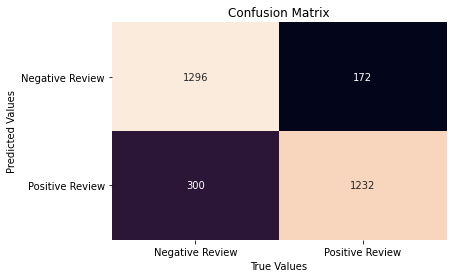

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True, cbar=False, xticklabels=['Negative Review', 'Positive Review'], yticklabels=['Negative Review', 'Positive Review'], fmt = "d")
plt.yticks(rotation = 0)
plt.title('Confusion Matrix')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()